In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_seville_2018 = pd.read_csv('data/clean_seville_2018.csv')
df_seville_2022 = pd.read_csv('data/clean_seville_2022.csv')
df_spain_2018   = pd.read_csv('data/clean_spain_2018.csv')
df_non_shared_seville_2018 = df_seville_2018[df_seville_2018['Tipo_Inmueble'] != 'Habitacion_Compartida']
df_non_shared_seville_2022 = df_seville_2022[df_seville_2022['Tipo_Inmueble'] != 'Habitacion_Compartida']

Estadísticas sobre los inmuebles ofertados

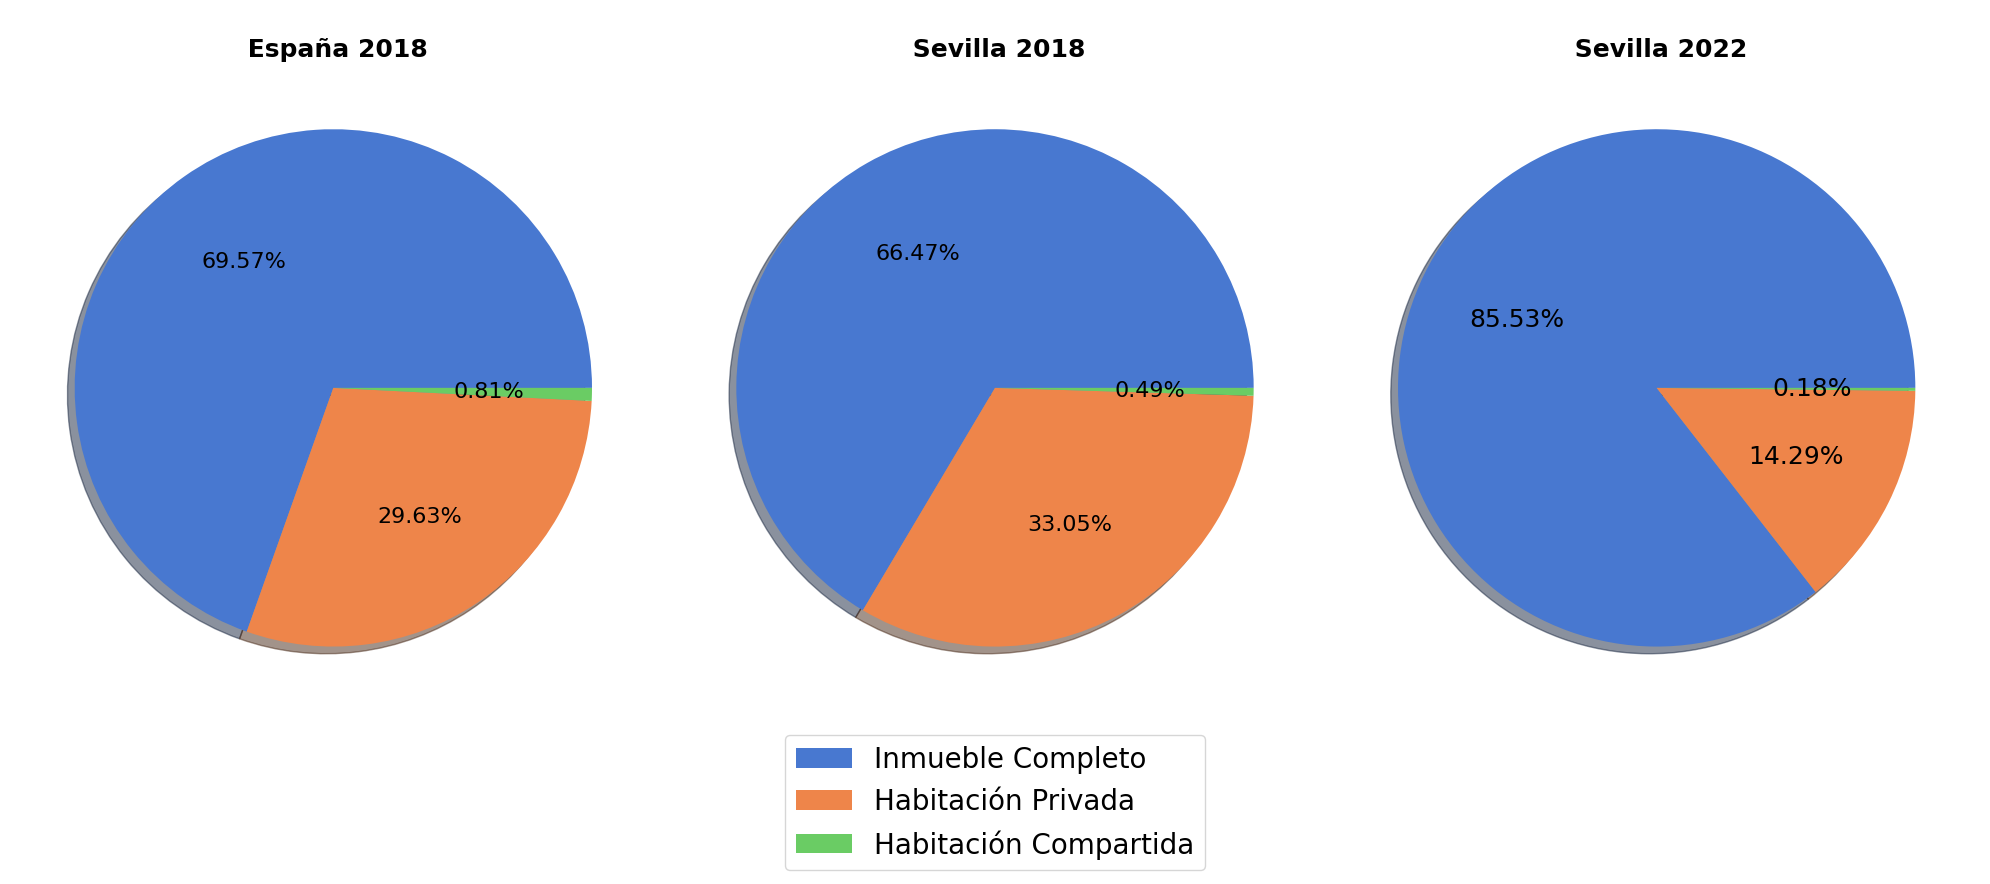

In [39]:
tip_inmueble_se2018 = df_seville_2018['Tipo_Inmueble'].value_counts()
tip_inmueble_se2022 = df_seville_2022['Tipo_Inmueble'].value_counts()
tip_inmueble_sp2018 = df_spain_2018['Tipo_Inmueble'].value_counts()


fig, ax = plt.subplots(1,3)
fig.set_size_inches((20,10))
ax[0].pie(x = tip_inmueble_sp2018.values,
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('muted'),
          shadow=True)
ax[1].pie(x = tip_inmueble_se2018.values,
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('muted'),
          shadow = True)
ax[2].pie(x = tip_inmueble_se2022,
          autopct='%1.2f%%',
          textprops={'fontsize' : 18},
          colors= sns.color_palette('muted'),
          shadow=True)

ax[0].set_title('\n España 2018',
                fontsize = 18,
                fontweight = 'bold')
ax[1].set_title('\n Sevilla 2018',
                fontsize = 18,
                fontweight = 'bold')
ax[2].set_title('\n Sevilla 2022',
                fontsize = 18,
                fontweight = 'bold')

fig.legend(['Inmueble Completo','Habitación Privada','Habitación Compartida'], loc = 'lower center', prop = {'size':20})

fig.tight_layout()


Estadísticas sobre la densidad publicitaria

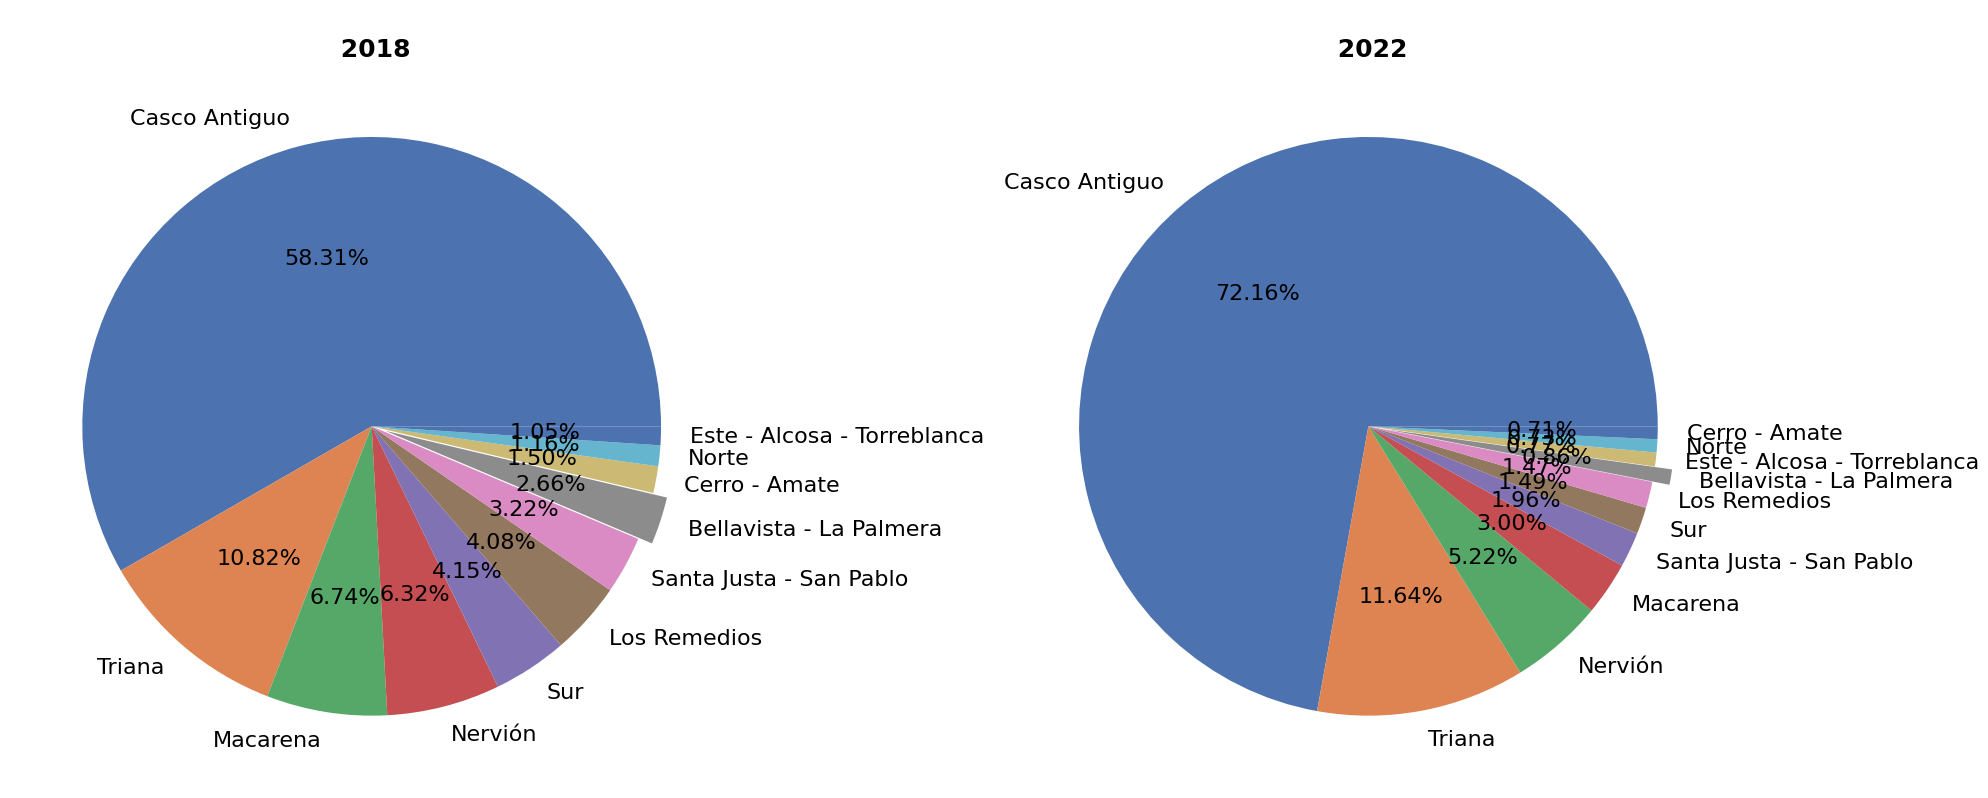

In [26]:
density_data_seville_2018 = df_seville_2018['Distrito'].value_counts()
density_data_seville_2022 = df_seville_2022['Distrito'].value_counts()


fig, ax = plt.subplots(1,2)
fig.set_size_inches((20,10))
ax[0].pie(x = density_data_seville_2018.values,
          labels = ['Casco Antiguo', 'Triana', 'Macarena', 'Nervión', 'Sur', 'Los Remedios', 'Santa Justa - San Pablo', 
                    'Bellavista - La Palmera', 'Cerro - Amate', 'Norte', 'Este - Alcosa - Torreblanca'],
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('deep'),
          explode= np.array([0]*7 + [0.05] + [0]*3))
ax[1].pie(x = density_data_seville_2022.values,
          labels = ['Casco Antiguo', 'Triana', 'Nervión','Macarena', 'Santa Justa - San Pablo', 'Sur', 'Los Remedios', 
                    'Bellavista - La Palmera', 'Este - Alcosa - Torreblanca', 'Norte', 'Cerro - Amate'],
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('deep'),
          explode= np.array([0]*7 + [0.06] + [0]*3))
ax[0].set_title('\n 2018',
                fontsize = 18,
                fontweight = 'bold')
ax[1].set_title('\n 2022',
                fontsize = 18,
                fontweight = 'bold')

fig.tight_layout()


Variación porcentual del precio del alquiler turístico en Sevilla

In [30]:
df_coincidences = pd.merge(df_seville_2018, df_seville_2022, on = 'Key', how = 'inner')
df_coincidences.drop([11,31,61,73,74,81,102,138,151,187,224,241,311], axis = 0, inplace = True )
df_coincidences.drop(columns = ['Fecha_Encuentro','Camas','Baños','Barrio_x','Barrio_y',
                                'Precio/Capacidad_x','Precio/Capacidad_y', 'Min_Nights_x', 
                                'Min_Nights_y','Anuncios_Totales_del_Host','Host_Key_x',
                                'Host_Key_y','Distrito_y','Tipo_Inmueble_y','Dormitorios_x',
                                'Dormitorios_y'], inplace = True)
df_coincidences.rename(columns={'Tipo_Inmueble_x':'Tipo_Inmueble',
                                'Distrito_x':'Distrito'}, inplace = True)
df_coincidences = df_coincidences.reindex(columns=['Key','Precio_x','Precio_y',
                                                   'Distrito','Tipo_Inmueble','Capacidad_x','Capacidad_y'])

In [50]:
df_coincidences['Variacion_Relativa'] = (df_coincidences['Precio_y'] - df_coincidences['Precio_x'])/df_coincidences['Precio_x']

gb_ti_coincidences = df_coincidences.groupby(by = 'Tipo_Inmueble')
var_quantile_003 = gb_ti_coincidences['Variacion_Relativa'].quantile(0.03)
var_quantile_097 = gb_ti_coincidences['Variacion_Relativa'].quantile(0.97)
df_coincidences['In_Quantiles_Margin'] = df_coincidences.apply(lambda row : 
                                                       (row.Variacion_Relativa >= var_quantile_003[row.Tipo_Inmueble]) &
                                                       (row.Variacion_Relativa <= var_quantile_097[row.Tipo_Inmueble]), axis =1)

df_coincidences_truncated = df_coincidences[df_coincidences['In_Quantiles_Margin'] == True].drop(columns={'In_Quantiles_Margin'})

In [54]:
df_coincidences_truncated['Variacion_Relativa'].describe()

count    282.000000
mean       0.237491
std        0.336021
min       -0.294416
25%       -0.011836
50%        0.166667
75%        0.440731
max        1.265823
Name: Variacion_Relativa, dtype: float64

Estadísticas sobre el precio

In [4]:
df_non_shared_seville_2018['Año'] = 2018
df_non_shared_seville_2022['Año'] = 2022
outer_merge = df_non_shared_seville_2018.merge(df_non_shared_seville_2022, how = 'outer')

C:\Users\m7pan\AppData\Local\Temp\ipykernel_21856\44231879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_shared_seville_2018['Año'] = 2018
C:\Users\m7pan\AppData\Local\Temp\ipykernel_21856\44231879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_shared_seville_2022['Año'] = 2022


In [5]:
media_precio_sevilla_2018 = df_non_shared_seville_2018['Precio'].mean()
media_precio_sevilla_2022 = df_non_shared_seville_2022['Precio'].mean()

(10.5, -0.5)

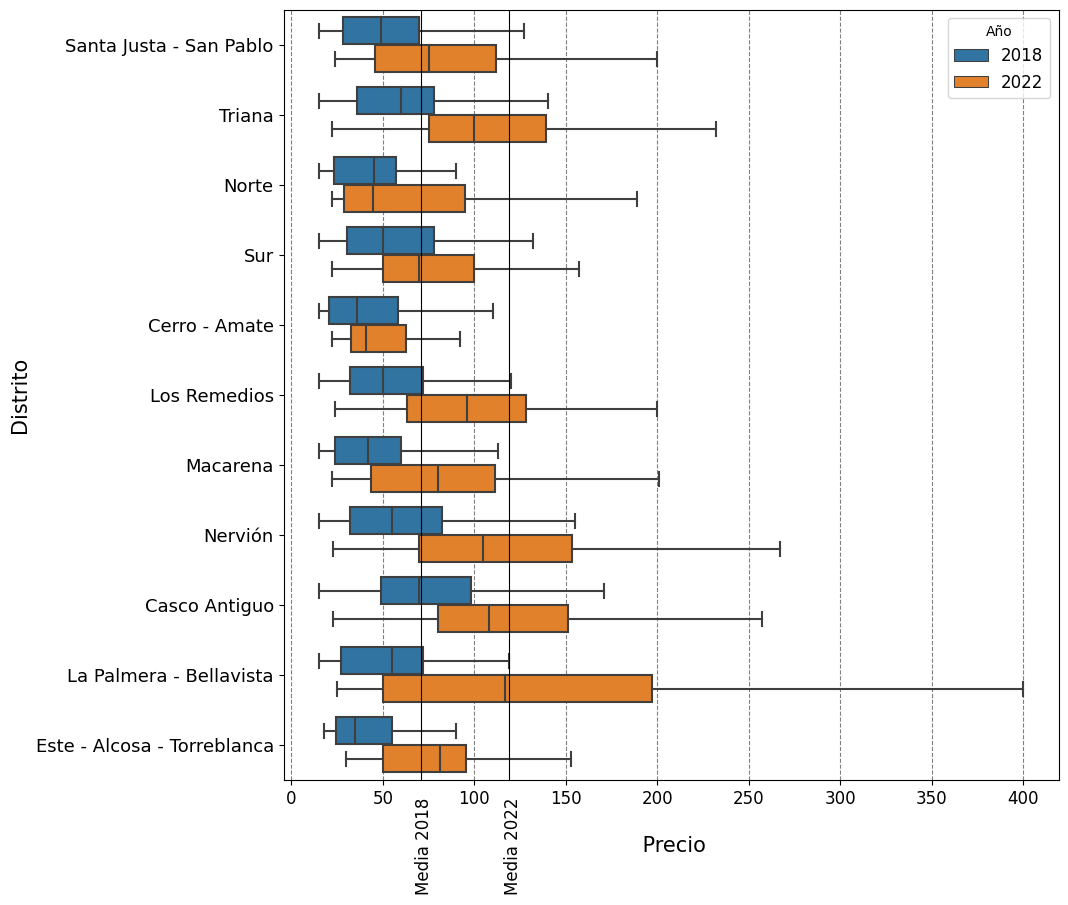

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

ax
sns.boxplot(data = outer_merge, 
            x = 'Precio', 
            y = 'Distrito',
            hue = 'Año',
            showfliers = False)
ylimits = ax.get_ylim()
ax.plot([media_precio_sevilla_2018,media_precio_sevilla_2018],
        ylimits,
        color = (0,0,0),
        linewidth = 0.8)
ax.plot([media_precio_sevilla_2022,media_precio_sevilla_2022],
        ylimits,
        color = (0,0,0),
        linewidth = 0.8)

ax.set_yticklabels('Santa Justa - San Pablo,Triana,Norte,Sur,Cerro - Amate,Los Remedios,Macarena,Nervión,Casco Antiguo,La Palmera - Bellavista,Este - Alcosa - Torreblanca'.split(sep = ','),
                    fontdict = {'fontsize' : 13})
plt.xticks(fontsize = 12)
ax.set_ylabel('Distrito', fontdict={'fontsize': 15})
ax.set_xlabel('\n Precio',fontdict={'fontsize':15})
ax.legend(title = 'Año', prop = {'size':12})

ax.text(x = media_precio_sevilla_2018 -3, y = ylimits[0] + 1.59, s = 'Media 2018', fontdict={'rotation':90,'fontsize':12})
ax.text(x = media_precio_sevilla_2022 -3, y = ylimits[0] + 1.59, s = 'Media 2022', fontdict={'rotation':90,'fontsize':12})

ax.set_ylim(ylimits)

Text(-0.8, 118.02294814209881, 'Media 2022')

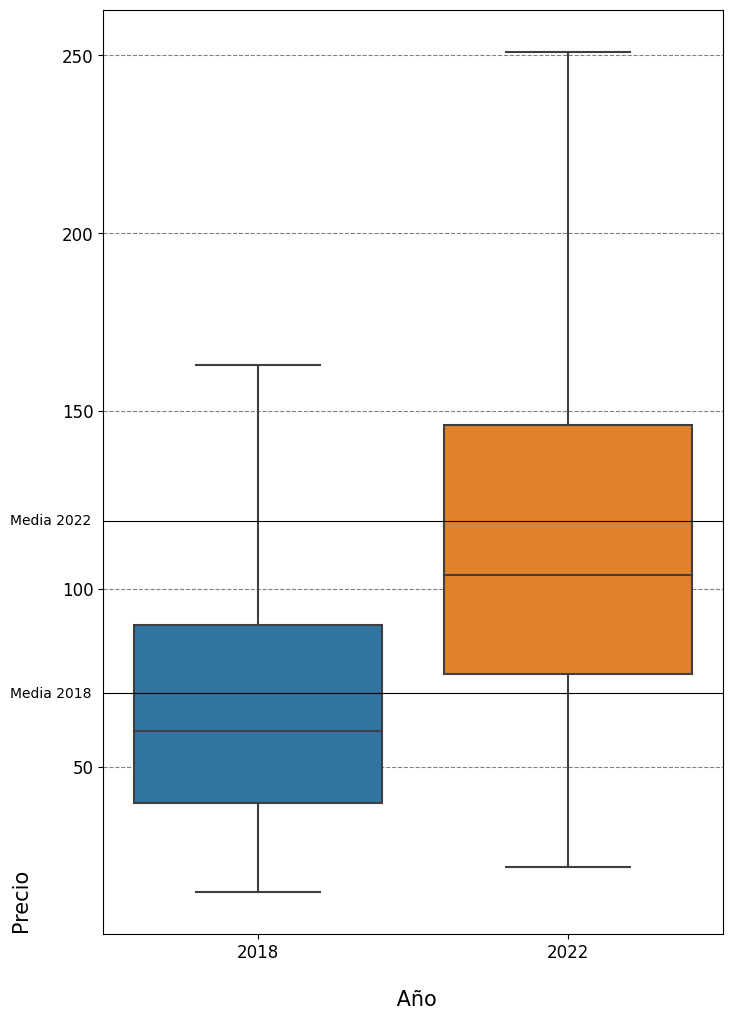

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(8,12)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax
sns.boxplot(data = outer_merge, 
            y = 'Precio', 
            x = 'Año',
            showfliers = False)
xlimits = ax.get_xlim()
ax.plot(xlimits,
        np.array([media_precio_sevilla_2018,media_precio_sevilla_2018]),
        color = (0,0,0),
        linewidth = 0.8)
ax.plot(xlimits,
        [media_precio_sevilla_2022,media_precio_sevilla_2022],
        color = (0,0,0),
        linewidth = 0.8)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_xlabel('\n Año', fontdict={'fontsize': 15})
ax.set_ylabel('Precio \n',loc = 'bottom',fontdict={'fontsize':15})

ax.text(y = media_precio_sevilla_2018 -1.2, x = xlimits[0] -0.3, s = 'Media 2018', fontdict={'fontsize':10})
ax.text(y = media_precio_sevilla_2022 -1.2, x = xlimits[0] -0.3, s = 'Media 2022', fontdict={'fontsize':10})

